### 라이브러리 임포트

In [9]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

### CSV 파일 불러오기

In [2]:
file_path = r"C:\Users\MinGi\Desktop\year3-sem1\인공지능개론\dataset\diabetes.csv"
df = pd.read_csv(file_path)

print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


### 레이블 개수 확인

In [3]:
df['BMI'].value_counts()

BMI
32.0    13
31.6    12
31.2    12
0.0     11
32.4    10
        ..
36.7     1
41.8     1
42.6     1
42.8     1
46.3     1
Name: count, Length: 248, dtype: int64

### 결측치 확인

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### 입력/정답 나누기 및 전처리

In [5]:
x = df.drop('Outcome', axis=1)
x = df.drop('BMI', axis=1)
y = df['BMI']

scaler = StandardScaler()
x = scaler.fit_transform(x)

### 원-핫 인코딩

In [19]:
Y = pd.get_dummies(y).values

### 훈련/테스트 나누기

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size=0.25,random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(576, 8) (576, 248)
(192, 8) (192, 248)


### 모델 정의

In [10]:
model = Sequential()

model.add(Dense(10,input_shape=(8,),activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━┳━━━━━━━━┓
┃                 ┃ Output      ┃  Param ┃
┃ Layer (type)    ┃ Shape       ┃      # ┃
┡━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━╇━━━━━━━━┩
│ dense_4 (Dense) │ (None, 10)  │     90 │
├─────────────────┼─────────────┼────────┤
│ dense_5 (Dense) │ (None, 8)   │     88 │
├─────────────────┼─────────────┼────────┤
│ dense_6 (Dense) │ (None, 6)   │     54 │
├─────────────────┼─────────────┼────────┤
│ dense_7 (Dense) │ (None, 1)   │      7 │
└─────────────────┴─────────────┴────────┘

 Total params: 239 (956.00 B)

 Trainable params: 239 (956.00 B)

 Non-trainable params: 0 (0.00 B)

### 모델 학습 및 예측

In [20]:
N_EPOCHS = 8
model_history = model.fit(x=x_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.1) # train의 10%를 validation으로 설정. 검증에 사용
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 2/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 3/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0041 - val_mse: 0.0041
Epoch 4/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 5/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 6/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 7/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 8/8
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040 - mse: 0.0040 - val_loss: 0.0040 - val_mse: 0.0040
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


### 손실 시각화

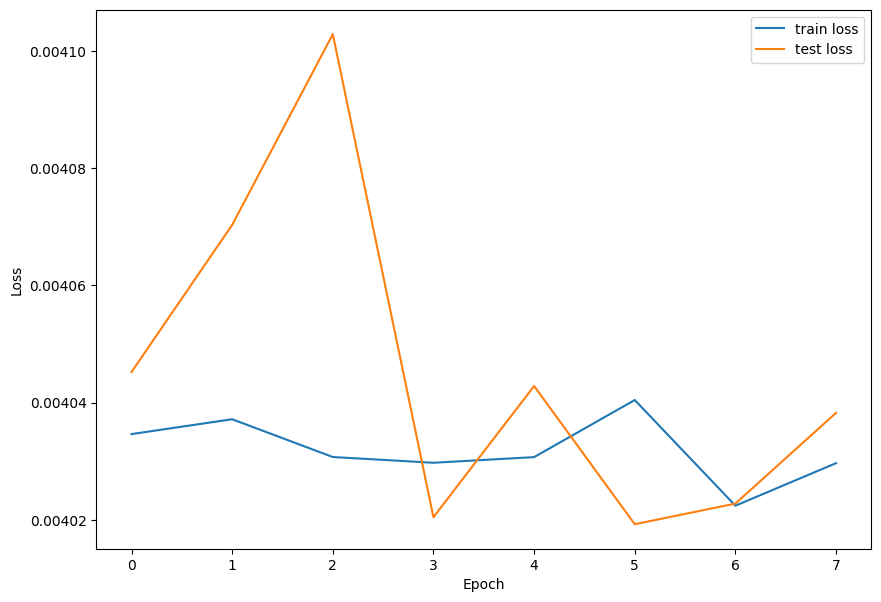

In [21]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), model_history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 모델 평가

In [22]:
model.evaluate(x_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0040 - mse: 0.0040 


[0.00404388178139925, 0.00404388178139925]